In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [94]:
#A. Cargue los datos e identifique cuantas variables categóricas (tipo object) y cuantas variables numéricas tiene.

df = pd.read_csv("spotify-2023.csv", encoding="latin1")
df.info(object)
print(df)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [96]:
#B. Desarrolle un algoritmo que nos diga cuantas canciones de Coldplay hay en la base de datos.

cc = df[df['artist(s)_name'] == 'Coldplay']
Ncc = cc.shape[0]
print(f"Número de canciones de Coldplay = {Ncc}")


Número de canciones de Coldplay = 3


In [97]:
#C. Encuentre el máximo y el mínimo de cada columna numérica en la base de datos
num = df.select_dtypes(include='number')
#maximos
Nmax = num.max()
Nmin = num.min()
print("El máximo es =\n ", Nmax)
print("\nEl mínimo es = \n", Nmin)


El máximo es =
  artist_count                8
released_year            2023
released_month             12
released_day               31
in_spotify_playlists    52898
in_spotify_charts         147
in_apple_playlists        672
in_apple_charts           275
in_deezer_charts           58
bpm                       206
danceability_%             96
valence_%                  97
energy_%                   97
acousticness_%             97
instrumentalness_%         91
liveness_%                 97
speechiness_%              64
dtype: int64

El mínimo es = 
 artist_count               1
released_year           1930
released_month             1
released_day               1
in_spotify_playlists      31
in_spotify_charts          0
in_apple_playlists         0
in_apple_charts            0
in_deezer_charts           0
bpm                       65
danceability_%            23
valence_%                  4
energy_%                   9
acousticness_%             0
instrumentalness_%         0
livenes

In [ ]:
#D. Desarrolle una función que reciba como parámetro su base de datos y un artista y le devuelva todas las canciones de ese artista en base de datos.


Tabla resumen:
        Artista  Cantidad
0      Coldplay         3
1  Taylor Swift        34
2         Total        37


Text(0.5, 1.0, 'Sumatoria de las canciones de Taylor Swift y Coldplay')

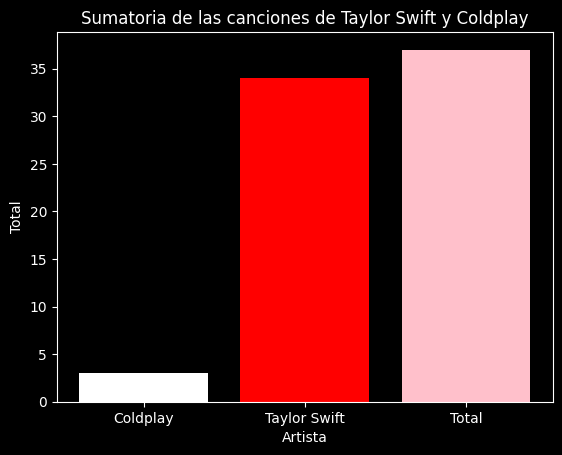

In [98]:
#E. Cree una tabla con una función de agregación, que muestre la sumatoria de cuantas canciones Taylor Swift y Coldplay aparecen en playlist.
Ncc 
cts = df[df["artist(s)_name"] == "Taylor Swift"]
Ncts = cts.shape[0]
sumatoria = Ncc + Ncts
Tabla = pd.DataFrame({"Artista": ["Coldplay", "Taylor Swift", "Total"], "Cantidad": [Ncc, Ncts, sumatoria]})
print("\nTabla resumen:")
print(Tabla)
plt.style.use("dark_background")
plt.bar(["Coldplay", "Taylor Swift", "Total"], [Ncc, Ncts, sumatoria], color=["white", "red", "pink"])
plt.xlabel("Artista")
plt.ylabel("Total")
plt.title("Sumatoria de las canciones de Taylor Swift y Coldplay")

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17728\1656875956.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[0].boxplot([df[df['artist_count'] == ac]['streams'] for ac in sorted(df['artist_count'].unique())],


TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

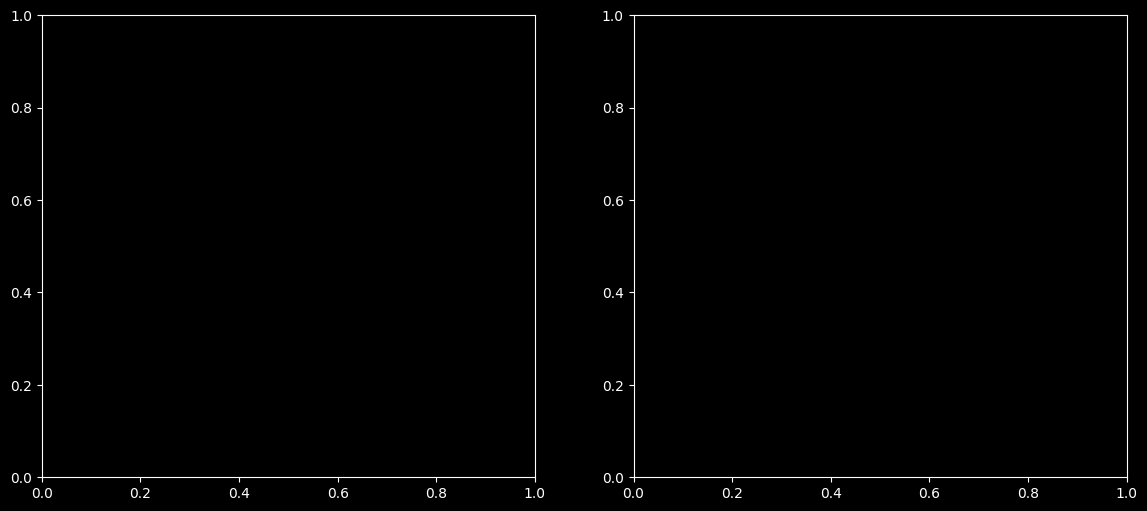

In [99]:
#F. Desarrolle un subplot con dos gráficos, el primero es un boxplot relacione artist_count (eje x) con streams, y el segundo un histograma de los años de lanzamiento.
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot: artist_count vs streams
axs[0].boxplot([df[df['artist_count'] == ac]['streams'] for ac in sorted(df['artist_count'].unique())],
               labels=sorted(df['artist_count'].unique()))
axs[0].set_xlabel('artist_count')
axs[0].set_ylabel('streams')
axs[0].set_title('Boxplot: artist_count vs streams')

# Histograma de los años de lanzamiento
axs[1].hist(df['released_year'], bins=20, color='skyblue', edgecolor='black')
axs[1].set_xlabel('Año de lanzamiento')
axs[1].set_ylabel('Cantidad de canciones')
axs[1].set_title('Histograma de años de lanzamiento')

plt.tight_layout()
plt.show()